In [51]:
import csv
import numpy as np

firstWhale = "w_1287fbc"
infile = open('whale/train.csv', mode='r')
rows = csv.reader(infile)
BobPics = []
UnknownPics = []
for row in rows:
    if row[1] == firstWhale:
        BobPics.append(row[0]) 
    else:
        UnknownPics.append(row[0])

UnknownPics = np.random.permutation(UnknownPics[10:60])

['00ac0e86.jpg' '008809b5.jpg' '00b7de10.jpg' '00be7f73.jpg' '01274a1e.jpg'
 '0175c4c1.jpg' '010f1fe2.jpg' '017ec31f.jpg' '00af84d8.jpg' '01496f0b.jpg'
 '0171d221.jpg' '00ec0dcd.jpg' '008baccf.jpg' '00be9148.jpg' '00aa021c.jpg'
 '00b588d6.jpg' '00467ae9.jpg' '00ded600.jpg' '0162c72f.jpg' '00f4c92c.jpg'
 '007c3603.jpg' '004c5fb9.jpg' '01228da4.jpg' '0078af23.jpg' '00863b8c.jpg'
 '011904f8.jpg' '00cf7bd3.jpg' '0091c92b.jpg' '010ecbb5.jpg' '00ad9219.jpg'
 '00d6b82e.jpg' '00b2c0cd.jpg' '01679a6d.jpg' '00ab018e.jpg' '00f22419.jpg'
 '00389cd7.jpg' '00eab0e6.jpg' '012621f1.jpg' '005c57e7.jpg' '0042ea34.jpg'
 '00a29f63.jpg' '0042dcc4.jpg' '0101d22b.jpg' '006d0aaf.jpg' '01692e13.jpg'
 '00acb5a9.jpg' '004a97f3.jpg' '009dca38.jpg' '01321d88.jpg' '00d3d48c.jpg'] 
 ['000466c4.jpg', '0603a403.jpg', '13503533.jpg', '1f2913e3.jpg', '2c3b34a3.jpg', '2c4813a1.jpg', '3cdd7fa7.jpg', '40abf606.jpg', '445c2164.jpg', '4604b292.jpg', '514cf008.jpg', '6d82e3d0.jpg', '7060ba65.jpg', '71a4fc90.jpg', '738fb42a.jp

In [58]:
class maxImageDimensions:
    def __init__(self):
        self.x = 0
        self.y = 0
    def compare(self,image):
        self.x = max([self.x, image.shape[0]])
        self.y = max([self.x, image.shape[1]])
    

77
1050


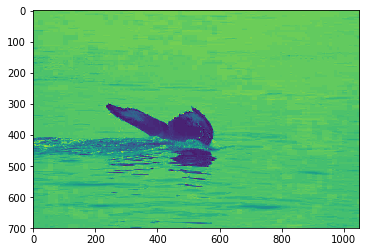

In [84]:
from PIL import Image
import matplotlib.pyplot as plt

BobsTail = []
UnknownsTail = []
padding = maxImageDimensions()
for p in BobPics:
    grey = np.asarray(Image.open("whale/" + p))[:,:,0]
    padding.compare(grey)
    BobsTail.append(grey)
for p in UnknownPics:
    try:
        grey = np.asarray(Image.open("whale/" + p))[:,:,0]
        padding.compare(grey)
        UnknownsTail.append(grey)
    except:
        pass
samples = len(BobsTail+UnknownsTail)
print(samples)
label = np.zeros((samples, 2))
Tail = []
for i in range(len(BobsTail)):
    Tail.append(np.zeros((padding.x,padding.y,1)))
    label[i,0] = 1
    x = BobsTail[i].shape[0]
    y = BobsTail[i].shape[1]
    Tail[-1][0:x,0:y,0] = BobsTail[i]
    Tail[-1].reshape(-1,padding.x,padding.y,1)
for i in range(len(UnknownsTail)):
    ind = i+len(BobsTail)
    Tail.append(np.zeros((padding.x,padding.y,1)))
    label[ind,0] = 1
    x = UnknownsTail[i].shape[0]
    y = UnknownsTail[i].shape[1]
    Tail[-1][0:x,0:y,0] = UnknownsTail[i]
    Tail[-1].reshape(-1,padding.x,padding.y,1)
    label[ind,1] = 1
    
print(padding.y)
plt.imshow(tail)
plt.show()

In [85]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (padding.x,padding.y,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "sigmoid"))
          
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [93]:
model.fit(Tail[0.3], label[0:3], epochs=5, batch_size=1)


ValueError: Error when checking input: expected conv2d_5_input to have 4 dimensions, but got array with shape (700, 1050, 1)